### Comparatif d'un neurones vs un reseaux a une couche vs un  reseaux a plusieurs couches

Creation de deux dataset de base l'un lineraire et l'autre non lineraire

In [2]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
plt.style.use('dark_background')

In [3]:
X_li,y_li = make_blobs(n_samples=2000,n_features=2,centers=2,random_state=0)
y_li = y_li.reshape((y_li.shape[0],1))
X_nl,y_nl = make_circles(n_samples=2000,noise=0.1,factor=0.3,random_state=0)
y_nl = y_nl.reshape((y_nl.shape[0],1))
print("X_li shape :",X_li.shape,'\n y_li shape :',y_li.shape,'\n X_nl shape :',X_nl.shape,'\n y_nl shape :',y_nl.shape)

X_li shape : (2000, 2) 
 y_li shape : (2000, 1) 
 X_nl shape : (2000, 2) 
 y_nl shape : (2000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

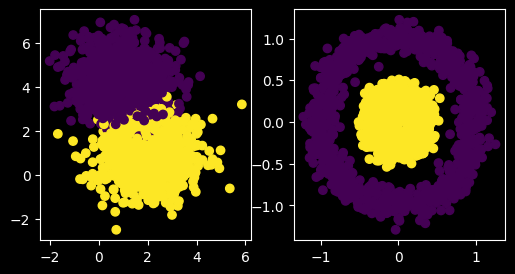

In [4]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.scatter(X_li[:,0],X_li[:,1],label = 'data set lineraire 0',c=y_li,cmap='viridis')
plt.subplot(1,2,2)
plt.scatter(X_nl[:,0],X_nl[:,1],label='data set non lineraire',c=y_nl,cmap='viridis')
plt.show

#### Reseaux a un neurone

In [5]:
import numpy as np
from numpy import random

In [6]:
#initilisation
def initialisation_l(X):
    W = random.randn(X.shape[1],1)
    b = random.randn(1)
    
    return W,b

In [7]:
#W_test,b_test = initialisation(X_li)
#print(W_test.shape)

In [8]:
#forward propagation
def froward_propagation_l(W,b,X):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A


In [9]:
#loss 
def log_loss_l(y,A):
    m = len(y)
    epsilon = 1e-15
    return (1 / m) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [10]:
# backward propagation
def backward_propagation_l(X,y,A,W,m):
    y = y.reshape(-1, 1)
    m = len(y)
    dW = (1/m)*X.T.dot(A-y)
    db  = (1/m)*np.sum(A-y)
    return dW,db

In [11]:
#update 
def update_l(W,b,dW,db,learning_rate):
    W = W -learning_rate*dW
    b = b -learning_rate*db
    return W,b

In [12]:
# fonction de prediction
def predict_l(X,W,b):
    A = froward_propagation_l(W,b,X)
    return A >= 0.5

In [13]:
print(max(X_li[:,0]),min(X_li[:,0]))
print(max(X_nl[:,0]),min(X_nl[:,0]))

5.856927736399993 -2.018342781681124
1.2496216757352168 -1.2220499841769095


In [14]:
# fonction pourtracer la frontier de decision du reseaux a un neurone 
def frontier_decision_l(X,W,b,y):
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]
    plt.figure(figsize=(12,6))
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.5)
    plt.show()


In [15]:
from tqdm import tqdm as tqdm

In [16]:
# on vas faire le neurons maitenant 
def neurone(X,y,learning_rate,n_inter=1000):

    W,b = initialisation_l(X)
    Loss =[]
    acc = []

    for i in tqdm(range(n_inter)):
        A = froward_propagation_l(W,b,X)
        dW,db =backward_propagation_l(X,y,A,W,b)
        W,b = update_l(W,b,dW,db,learning_rate)
        y_pred = predict_l(X,W,b)
        Loss.append(log_loss_l(y,A))
        acc.append(accuracy_score(y.ravel(),y_pred.ravel()))


    y_pred = predict_l(X,W,b)
    print(accuracy_score(y.ravel(),y_pred.ravel()))
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.plot(Loss)

    plt.subplot(1,3,2)
    plt.plot(acc)

    plt.subplot(1,3,3)
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.05)

    plt.show() 
    return(W,b)
        


100%|██████████| 10000/10000 [00:03<00:00, 3272.26it/s]


0.9585


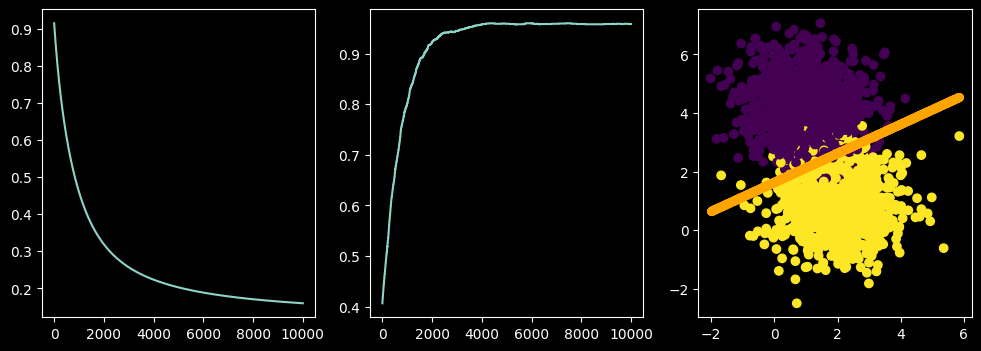

100%|██████████| 30000/30000 [00:09<00:00, 3294.23it/s]


0.5015


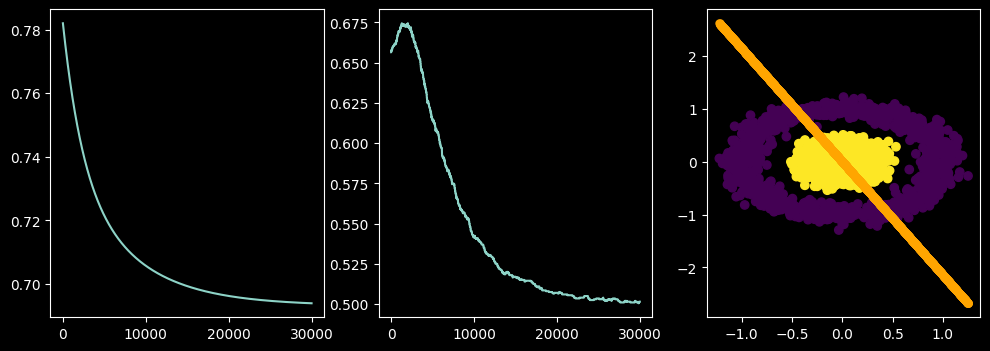

In [17]:
W_li,b_li = neurone(X_li,y_li,learning_rate=0.001,n_inter=10000)
W_nl,b_nl = neurone(X_nl,y_nl,learning_rate=0.001,n_inter=30000)

# definition du reseaux de neurones a une couche 

In [31]:
def initialisation(n0,n1,n2):
    W0 = np.random.randn(n1,n0)
    b0 = np.random.randn(n1,1)

    W1 = np.random.randn(n2,n1)
    b1 = np.random.randn(n2,1) 

    parametres={
        'W0':W0,
        'b0':b0,
        'W1':W1,
        'b1':b1
    }
    
    return parametres

In [27]:
def forward_propagation(X,parametres):

    W0 = parametres['W0']
    b0 = parametres['b0']

    W1 = parametres['W1']
    b1 = parametres['b1']

    Z0 = W0.dot(X)+b0
    A0 = 1/(1+np.exp(-Z0)) 

    Z1 = W1.dot(A0)+b1
    A1 = 1/(1+np.exp(-Z1))

    activations={
        'A0':A0,
        'A1':A1
    } 
    return activations


In [33]:
def backward_propagation(X,y,activations,parametres):
    W0 = parametres['W0']
    b0 = parametres['b0']

    W1 = parametres['W1']
    A1 = activations['A1']

    m = y.shape[1]

    dZ1 = (A1-y)
    dZ0 = np.dot(W1.T,dZ1)*A1*(1-A1)

    dW1 = (1/m)*dZ1.dot(A1.T)
    dW0 = (1/m)*dZ1.dot(X.T)

    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    db0 = (1/m)*np.sum(dZ0,axis=1,keepdims=True)

    gradients={
        'dW1':dW1,
        'db1':db1,
        'dW0':dW0,
        'db0':db0
    }

    return gradients




In [22]:
def update(parametres,gradients,learning_rate):
    W0 = parametres['W0']
    b0 = parametres['b0']

    W1 = parametres['W1']
    b1 = parametres['b1']

    dW0 = gradients['dW0']
    db0 = gradients['db0'] 

    dW1 = gradients['dW1']
    db1 = gradients['db1']  
    
    W0 = W0 - learning_rate*dW0
    b0 = b0 - learning_rate*db0

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1

    parametres={
        'W0':W0,
        'b0':b0,
        'W1':W1,
        'b1':b1
    }
    return parametres

In [23]:
def predict(X,parameters):
    activations = forward_propagation(X,parameters)
    A1 = parameters['A1']
    return A1 >= 0.5

In [25]:
def neural_network(X,y,n_iter,learning_rate,n1):
    n0 = X.shape[0]
    n2 = y.shape[0]
    parameters = initialisation(n0,n1,n2)
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X,parameters)
        gradients = backward_propagation(X,y,activations,parameters)
        parameters = update(parameters,gradients,learning_rate)

        if i%10 == 0 :
            y_pred = predict(X,parameters) 
    return parameters

In [34]:
W_li_1,b_li_1 = neural_network(X_li,y_li,1000,0.01,3)

  0%|          | 0/1000 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (3,2) (2000,2) 